In [ ]:
!pip install pandas pyarrow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)



file_path = '/content/drive/My Drive/sber/decoded_transactions_19kk.parquet'

df = pd.read_parquet(file_path)

df_sample = df.head(1000000)


print(f"Выбраны {len(df_sample)} транзакций:")
print(df_sample.head())

decoded_file_path = '/content/drive/My Drive/sber/decoded_transactions_1000000_sample.parquet'
df_sample.to_parquet(decoded_file_path)



Mounted at /content/drive
Выбраны 1000000 транзакций:
    timestamp  block_number  \
0  1716587039      19942500   
1  1716587039      19942500   
2  1716587039      19942500   
3  1716587039      19942500   
4  1716587039      19942500   

                                                                                            transaction_hash  \
0         b'\xd7\x02\xd4eC\xd2;4\x12\x9b\xb2\xea#|C\x102\x1b\xae\xfc\xd2]\x99u\x16\xb5\xafM\xa3\xc3\x1b\x19'   
1     b'\xfb\x81\xf6\t\xd0\x7f~\xdbr\x9f\xee\x9fE\xe6\xf2\x8e\x84XI\x82$\xeeG\xbd\xb3\xcb\xbcg\x0b"\x07\x18'   
2                        b'\xdf\x1fw;\xd2)\xa6\x9cSpR5(\xd0#\xea\x84\xf7R!cK\x8b+\xea\x14\x04\x07Pq\x83\xa5'   
3                        b'T\xffg\xda\xc0M\x15\xaf\x0c8\x9c\x91y(\xcbegJ\xbd\xcf+)\x7ft\x9e29\xfe\x0f\x8dR]'   
4  b'\x81m{\x98\xef\xed\x1f\xd9\xa7\x01\x98\x12\xaf\x82\t\xad\x18\xd1y\xa7\xe1|\xa8\xf7z\xa4\xfcID\x87i\xef'   

                                                                 from_address  \
0    

In [ ]:

import pandas as pd
import binascii


def decode_binary_data(value):
    if isinstance(value, (bytes, bytearray)):
        return '0x' + binascii.hexlify(value).decode('utf-8')
    return value

file_path = '/content/drive/My Drive/sber/decoded_transactions_1000000_sample.parquet'
df_sample = pd.read_parquet(file_path)


columns_to_decode = ['transaction_hash', 'from_address', 'to_address']

for col in columns_to_decode:
    df_sample[col] = df_sample[col].apply(decode_binary_data)

print(df_sample.head())


decoded_file_path = '/content/drive/My Drive/sber/decoded_transactions_decoded_sample.parquet'
df_sample.to_parquet(decoded_file_path)
print(f"Декодированный файл с 100 000 транзакциями сохранен как: {decoded_file_path}")


    timestamp  block_number  \
0  1716587039      19942500   
1  1716587039      19942500   
2  1716587039      19942500   
3  1716587039      19942500   
4  1716587039      19942500   

                                                     transaction_hash  \
0  0xd702d46543d23b34129bb2ea237c4310321baefcd25d997516b5af4da3c31b19   
1  0xfb81f609d07f7edb729fee9f45e6f28e8458498224ee47bdb3cbbc670b220718   
2  0xdf1f773bd229a69c5370523528d023ea84f75221634b8b2bea140407507183a5   
3  0x54ff67dac04d15af0c389c917928cb65674abdcf2b297f749e3239fe0f8d525d   
4  0x816d7b98efed1fd9a7019812af8209ad18d179a7e17ca8f77aa4fc49448769ef   

                                 from_address  \
0  0xb23360ccdd9ed1b15d45e5d3824bb409c8d7c460   
1  0x21a31ee1afc51d94c2efccaa2092ad1028285549   
2  0xbd0fccdc19bc3b979e8e256b7b88aae7c77a5bec   
3  0xe95a045e03d7be179b8cbb61091a0c89ffb7ae02   
4  0xfe0c760cbcb9da239b9ba805f0aeaed3be84f65a   

                                   to_address  \
0  0xdac17f958d2ee523a22062069

In [ ]:
df_sample.head(10)

,timestamp,block_number,transaction_hash,from_address,to_address,decoded_input,signature,errors,block_1kk,date
0,1716587039,19942500,0xd702d46543d23b34129bb2ea237c4310321baefcd25d997516b5af4da3c31b19,0xb23360ccdd9ed1b15d45e5d3824bb409c8d7c460,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x024294718D1E46EE98186bD971A1cDcBD9B35d23"", ""_value"": 23726210}","transfer(address,uint256)",,19,2024-05-24
1,1716587039,19942500,0xfb81f609d07f7edb729fee9f45e6f28e8458498224ee47bdb3cbbc670b220718,0x21a31ee1afc51d94c2efccaa2092ad1028285549,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x22EE55141ec10728e4C084bDBF7e58748De4aF17"", ""_value"": 376338417}","transfer(address,uint256)",,19,2024-05-24
2,1716587039,19942500,0xdf1f773bd229a69c5370523528d023ea84f75221634b8b2bea140407507183a5,0xbd0fccdc19bc3b979e8e256b7b88aae7c77a5bec,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02"", ""_value"": 90000000}","transfer(address,uint256)",,19,2024-05-24
3,1716587039,19942500,0x54ff67dac04d15af0c389c917928cb65674abdcf2b297f749e3239fe0f8d525d,0xe95a045e03d7be179b8cbb61091a0c89ffb7ae02,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9"", ""_value"": 47160000}","transfer(address,uint256)",,19,2024-05-24
4,1716587039,19942500,0x816d7b98efed1fd9a7019812af8209ad18d179a7e17ca8f77aa4fc49448769ef,0xfe0c760cbcb9da239b9ba805f0aeaed3be84f65a,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D"", ""_value"": 12808719147}","transfer(address,uint256)",,19,2024-05-24
5,1716587039,19942500,0x9e3e5133eb9930e6fd2285e4ed57fbae5ea0ba67f62a46146ad1b05cb76cfe6b,0x6fe6971996b632debd0ff4f38b6e70fe6b52e5c8,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_spender"": ""0x45fAa8c11F5395C3dF08942dC809eB4f5D9bb28d"", ""_value"": 1000000000000000000000000000000}","approve(address,uint256)",,19,2024-05-24
6,1716587039,19942500,0x777c2d3af04d7fd1e8d4b2b16a4855baefccb7ae38c033081ca8760152a34d2f,0x8520a07d7398ee2afdb19a677e1227d8a080ac74,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x974CaA59e49682CdA0AD2bbe82983419A2ECC400"", ""_value"": 18000000000}","transfer(address,uint256)",,19,2024-05-24
7,1716587039,19942500,0x6cab12bf1427c440e62e9197db092b885af8ea56035ea4b6a8676d4cf2f8ed2f,0x974caa59e49682cda0ad2bbe82983419a2ecc400,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x18A72e99F7602e262C795227E43bA86eF19690B5"", ""_value"": 1650000000}","transfer(address,uint256)",,19,2024-05-24
8,1716587039,19942500,0x944d6cd22a231252fc7b200fda6772acd1a32a7e5e8960c7da4a56902b3a4dd5,0x9969ad6f9540addd0df1ab136b67fbd2fd75c738,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x83ad7e8040c146554A13c3Ec41a177D0b5c60EBd"", ""_value"": 115358700}","transfer(address,uint256)",,19,2024-05-24
9,1716587039,19942500,0xfe8c96022cb7a85841eb0a9292b847841fe2ceec85f0e336bedc582d6f02d3f5,0x97ace7670c9a808ce6514bccff396d4f2e4c9bf6,0xdac17f958d2ee523a2206206994597c13d831ec7,"{""_to"": ""0x77BC22F0C10cEB763aF4F31fa892E89F768Ebb81"", ""_value"": 103000000}","transfer(address,uint256)",,19,2024-05-24


In [ ]:
import json


def extract_to_address(decoded_input):
    try:
        decoded_json = json.loads(decoded_input)
        return decoded_json.get('_to', None)
    except (json.JSONDecodeError, TypeError):
        return None

# Применяем функцию к столбцу decoded_input и заменяем значения в to_address
df_sample['to_address'] = df_sample['decoded_input'].apply(extract_to_address)


print(df_sample[['to_address', 'decoded_input']].head())


decoded_file_path = '/content/drive/My Drive/sber/decoded_transactions_corrected_to_address.parquet'
df_sample.to_parquet(decoded_file_path)
print(f"Файл с обновленными адресами 'to_address' сохранен как: {decoded_file_path}")


                                   to_address  \
0  0x024294718D1E46EE98186bD971A1cDcBD9B35d23   
1  0x22EE55141ec10728e4C084bDBF7e58748De4aF17   
2  0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02   
3  0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9   
4  0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D   

                                                                  decoded_input  
0     {"_to": "0x024294718D1E46EE98186bD971A1cDcBD9B35d23", "_value": 23726210}  
1    {"_to": "0x22EE55141ec10728e4C084bDBF7e58748De4aF17", "_value": 376338417}  
2     {"_to": "0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02", "_value": 90000000}  
3     {"_to": "0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9", "_value": 47160000}  
4  {"_to": "0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D", "_value": 12808719147}  
Файл с обновленными адресами 'to_address' сохранен как: /content/drive/My Drive/sber/decoded_transactions_corrected_to_address.parquet


In [ ]:
print(len(df_sample))

1000000


In [ ]:
# Функция для извлечения значения '_value' из столбца decoded_input
def extract_value(decoded_input):
    try:
        decoded_json = json.loads(decoded_input)
        return decoded_json.get('_value', None)
    except (json.JSONDecodeError, TypeError):
        return None

df_sample['value'] = df_sample['decoded_input'].apply(extract_value)

print(df_sample[['value', 'decoded_input']].head())



         value  \
0     23726210   
1    376338417   
2     90000000   
3     47160000   
4  12808719147   

                                                                  decoded_input  
0     {"_to": "0x024294718D1E46EE98186bD971A1cDcBD9B35d23", "_value": 23726210}  
1    {"_to": "0x22EE55141ec10728e4C084bDBF7e58748De4aF17", "_value": 376338417}  
2     {"_to": "0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02", "_value": 90000000}  
3     {"_to": "0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9", "_value": 47160000}  
4  {"_to": "0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D", "_value": 12808719147}  


In [ ]:
df_sample.head()

,timestamp,block_number,transaction_hash,from_address,to_address,decoded_input,signature,errors,block_1kk,date,value
0,1716587039,19942500,0xd702d46543d23b34129bb2ea237c4310321baefcd25d997516b5af4da3c31b19,0xb23360ccdd9ed1b15d45e5d3824bb409c8d7c460,0x024294718D1E46EE98186bD971A1cDcBD9B35d23,"{""_to"": ""0x024294718D1E46EE98186bD971A1cDcBD9B35d23"", ""_value"": 23726210}","transfer(address,uint256)",,19,2024-05-24,23726210
1,1716587039,19942500,0xfb81f609d07f7edb729fee9f45e6f28e8458498224ee47bdb3cbbc670b220718,0x21a31ee1afc51d94c2efccaa2092ad1028285549,0x22EE55141ec10728e4C084bDBF7e58748De4aF17,"{""_to"": ""0x22EE55141ec10728e4C084bDBF7e58748De4aF17"", ""_value"": 376338417}","transfer(address,uint256)",,19,2024-05-24,376338417
2,1716587039,19942500,0xdf1f773bd229a69c5370523528d023ea84f75221634b8b2bea140407507183a5,0xbd0fccdc19bc3b979e8e256b7b88aae7c77a5bec,0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02,"{""_to"": ""0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02"", ""_value"": 90000000}","transfer(address,uint256)",,19,2024-05-24,90000000
3,1716587039,19942500,0x54ff67dac04d15af0c389c917928cb65674abdcf2b297f749e3239fe0f8d525d,0xe95a045e03d7be179b8cbb61091a0c89ffb7ae02,0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9,"{""_to"": ""0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9"", ""_value"": 47160000}","transfer(address,uint256)",,19,2024-05-24,47160000
4,1716587039,19942500,0x816d7b98efed1fd9a7019812af8209ad18d179a7e17ca8f77aa4fc49448769ef,0xfe0c760cbcb9da239b9ba805f0aeaed3be84f65a,0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D,"{""_to"": ""0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D"", ""_value"": 12808719147}","transfer(address,uint256)",,19,2024-05-24,12808719147


In [ ]:

df_sample['value_in_usd'] = df_sample['value'].apply(lambda x: x / 1_000_000 if x is not None else 0)


pd.options.display.float_format = '{:.2f}'.format


print(df_sample[['value', 'value_in_usd']].head())

         value  value_in_usd
0     23726210         23.73
1    376338417        376.34
2     90000000         90.00
3     47160000         47.16
4  12808719147      12808.72


In [ ]:
df_sample.head(10)

,timestamp,block_number,transaction_hash,from_address,to_address,decoded_input,signature,errors,block_1kk,date,value,value_in_usd
0,1716587039,19942500,0xd702d46543d23b34129bb2ea237c4310321baefcd25d997516b5af4da3c31b19,0xb23360ccdd9ed1b15d45e5d3824bb409c8d7c460,0x024294718D1E46EE98186bD971A1cDcBD9B35d23,"{""_to"": ""0x024294718D1E46EE98186bD971A1cDcBD9B35d23"", ""_value"": 23726210}","transfer(address,uint256)",,19,2024-05-24,23726210,23.73
1,1716587039,19942500,0xfb81f609d07f7edb729fee9f45e6f28e8458498224ee47bdb3cbbc670b220718,0x21a31ee1afc51d94c2efccaa2092ad1028285549,0x22EE55141ec10728e4C084bDBF7e58748De4aF17,"{""_to"": ""0x22EE55141ec10728e4C084bDBF7e58748De4aF17"", ""_value"": 376338417}","transfer(address,uint256)",,19,2024-05-24,376338417,376.34
2,1716587039,19942500,0xdf1f773bd229a69c5370523528d023ea84f75221634b8b2bea140407507183a5,0xbd0fccdc19bc3b979e8e256b7b88aae7c77a5bec,0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02,"{""_to"": ""0x25Fb5abc1DD4ad769ef170AC441053CFe40C5C02"", ""_value"": 90000000}","transfer(address,uint256)",,19,2024-05-24,90000000,90.00
3,1716587039,19942500,0x54ff67dac04d15af0c389c917928cb65674abdcf2b297f749e3239fe0f8d525d,0xe95a045e03d7be179b8cbb61091a0c89ffb7ae02,0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9,"{""_to"": ""0x024bA3DED882b97230Fe18d3c318758BB7DCD4c9"", ""_value"": 47160000}","transfer(address,uint256)",,19,2024-05-24,47160000,47.16
4,1716587039,19942500,0x816d7b98efed1fd9a7019812af8209ad18d179a7e17ca8f77aa4fc49448769ef,0xfe0c760cbcb9da239b9ba805f0aeaed3be84f65a,0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D,"{""_to"": ""0x3b5991f627fF9323E4c42ee2196a05ebAC95D79D"", ""_value"": 12808719147}","transfer(address,uint256)",,19,2024-05-24,12808719147,12808.72
5,1716587039,19942500,0x9e3e5133eb9930e6fd2285e4ed57fbae5ea0ba67f62a46146ad1b05cb76cfe6b,0x6fe6971996b632debd0ff4f38b6e70fe6b52e5c8,None,"{""_spender"": ""0x45fAa8c11F5395C3dF08942dC809eB4f5D9bb28d"", ""_value"": 1000000000000000000000000000000}","approve(address,uint256)",,19,2024-05-24,1000000000000000000000000000000,999999999999999983222784.00
6,1716587039,19942500,0x777c2d3af04d7fd1e8d4b2b16a4855baefccb7ae38c033081ca8760152a34d2f,0x8520a07d7398ee2afdb19a677e1227d8a080ac74,0x974CaA59e49682CdA0AD2bbe82983419A2ECC400,"{""_to"": ""0x974CaA59e49682CdA0AD2bbe82983419A2ECC400"", ""_value"": 18000000000}","transfer(address,uint256)",,19,2024-05-24,18000000000,18000.00
7,1716587039,19942500,0x6cab12bf1427c440e62e9197db092b885af8ea56035ea4b6a8676d4cf2f8ed2f,0x974caa59e49682cda0ad2bbe82983419a2ecc400,0x18A72e99F7602e262C795227E43bA86eF19690B5,"{""_to"": ""0x18A72e99F7602e262C795227E43bA86eF19690B5"", ""_value"": 1650000000}","transfer(address,uint256)",,19,2024-05-24,1650000000,1650.00
8,1716587039,19942500,0x944d6cd22a231252fc7b200fda6772acd1a32a7e5e8960c7da4a56902b3a4dd5,0x9969ad6f9540addd0df1ab136b67fbd2fd75c738,0x83ad7e8040c146554A13c3Ec41a177D0b5c60EBd,"{""_to"": ""0x83ad7e8040c146554A13c3Ec41a177D0b5c60EBd"", ""_value"": 115358700}","transfer(address,uint256)",,19,2024-05-24,115358700,115.36
9,1716587039,19942500,0xfe8c96022cb7a85841eb0a9292b847841fe2ceec85f0e336bedc582d6f02d3f5,0x97ace7670c9a808ce6514bccff396d4f2e4c9bf6,0x77BC22F0C10cEB763aF4F31fa892E89F768Ebb81,"{""_to"": ""0x77BC22F0C10cEB763aF4F31fa892E89F768Ebb81"", ""_value"": 103000000}","transfer(address,uint256)",,19,2024-05-24,103000000,103.00


In [ ]:
function_counts = df_sample['signature'].value_counts()

# Вывод результатов
print(function_counts)

signature
transfer(address,uint256)                900712
approve(address,uint256)                  66333
transferFrom(address,address,uint256)     32955
Name: count, dtype: int64


In [ ]:
import pandas as pd

functions_to_remove = ['approve(address,uint256)', 'transferFrom(address,address,uint256)']


df_sample = df_sample[~df_sample['signature'].isin(functions_to_remove)]

print(len(df_sample))


900712


In [ ]:
print(df_sample['to_address'].nunique())

342465


In [ ]:
# Устанавливаем порог для value_in_usd, выше которого будем считать транзакцию аномальной
threshold = 1e7

df_sample = df_sample[df_sample['value_in_usd'] <= threshold]

print("Количество транзакций после фильтрации:",  len(df_sample))


Количество транзакций после фильтрации: 900440


In [ ]:
threshold = 1000000
high_value_transactions = df_sample[df_sample['value_in_usd'] > threshold]
# Выводим количество таких транзакций
print("Количество транзакций, где value_in_usd больше :", high_value_transactions)


Выходные данные были обрезаны до нескольких последних строк (5000).
245472   1228785771156    1228785.77  
245634   2204188000000    2204188.00  
245716   1003029000000    1003029.00  
245738   1003029000000    1003029.00  
245783   4164410000000    4164410.00  
245862   1084616000000    1084616.00  
245977   1750000000000    1750000.00  
246072   1103600000000    1103600.00  
246089   2047400000000    2047400.00  
246094   2003165640000    2003165.64  
246437   2000000000000    2000000.00  
246481   1750000000000    1750000.00  
246535   2000000000000    2000000.00  
246809   2047441000000    2047441.00  
246869   2077240280000    2077240.28  
247047   2499900000000    2499900.00  
247055   3000000000000    3000000.00  
247073   2000000000000    2000000.00  
247089   2000000000000    2000000.00  
247335   2500000000000    2500000.00  
247524   1750000000000    1750000.00  
247579   2458841000000    2458841.00  
247597   1422247275956    1422247.28  
247811   1300000000000    1300000.0

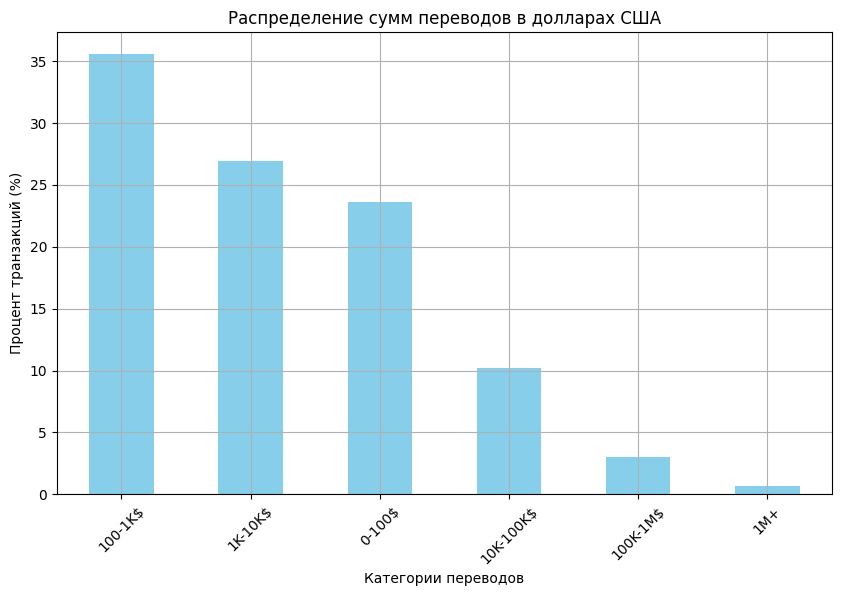

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['0-100$', '100-1K$', '1K-10K$', '10K-100K$', '100K-1M$', '1M+']


df_sample['value_category'] = pd.cut(df_sample['value_in_usd'], bins=bins, labels=labels)


category_distribution = df_sample['value_category'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')

plt.title('Распределение сумм переводов в долларах США')
plt.xlabel('Категории переводов')
plt.ylabel('Процент транзакций (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd


df_sample['date'] = pd.to_datetime(df_sample['timestamp'], unit='s')
df_sample['day_of_week'] = df_sample['date'].dt.dayofweek
df_sample['hour'] = df_sample['date'].dt.hour


grouped = df_sample.groupby('from_address').agg(
    from_address=('from_address', 'first'),  # Добавляем адрес кошелька
    num_transactions=('transaction_hash', 'nunique'),
    total_volume_usd=('value_in_usd', 'sum'),
    avg_transaction_value=('value_in_usd', 'mean'),
    max_transaction_value=('value_in_usd', 'max'),
    median_transaction_value=('value_in_usd', 'median'),
    total_unique_recipients=('to_address', 'nunique')
).reset_index(drop=True)


large_transfer_threshold = 10000
grouped['large_transfers'] = df_sample[df_sample['value_in_usd'] > large_transfer_threshold].groupby('from_address')['transaction_hash'].nunique()
grouped['large_transfers'] = grouped['large_transfers'].fillna(0)


last_week = pd.Timestamp.now() - pd.Timedelta(days=7)
last_month = pd.Timestamp.now() - pd.Timedelta(days=30)

df_sample['is_last_week'] = df_sample['date'] >= last_week
df_sample['is_last_month'] = df_sample['date'] >= last_month

last_week_counts = df_sample[df_sample['is_last_week']].groupby('from_address').size()
last_month_counts = df_sample[df_sample['is_last_month']].groupby('from_address').size()

grouped['transactions_last_week'] = grouped['from_address'].map(last_week_counts).fillna(0).astype(int)
grouped['transactions_last_month'] = grouped['from_address'].map(last_month_counts).fillna(0).astype(int)


timezone_conditions = [
    (df_sample['hour'].between(0, 7)),
    (df_sample['hour'].between(8, 15)),
    (df_sample['hour'].between(16, 23))
]
timezone_choices = ['Asia', 'Europe', 'US']
df_sample['timezone'] = pd.cut(df_sample['hour'], bins=[0, 7, 15, 23], labels=timezone_choices, include_lowest=True)

timezone_frequency = df_sample.groupby(['from_address', 'day_of_week', 'timezone']).size().unstack(fill_value=0)
df_final = grouped.merge(timezone_frequency, on='from_address', how='left')


df_sample['pair'] = df_sample.apply(lambda x: frozenset([x['from_address'], x['to_address']]), axis=1)
bidirectional_transfers = df_sample.groupby('pair').filter(lambda x: len(x) > 1).groupby('from_address').size()
grouped['bidirectional_transfers'] = grouped['from_address'].map(bidirectional_transfers).fillna(0)

unique_days = df_sample.groupby('from_address')['date'].nunique()
grouped['unique_days'] = grouped['from_address'].map(unique_days)


df_final = grouped


print(df_final.head())


<ipython-input-16-8d42f1ec5451>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timezone_frequency = df_sample.groupby(['from_address', 'day_of_week', 'timezone']).size().unstack(fill_value=0)


                                 from_address  num_transactions  \
0  0x00000000b3092fd689d264d5639d1d0fdbd75702                25   
1  0x00000000c001e13b7b74b7aa01afd9c77f907a7a                 1   
2  0x00000000e4da7e74bf3519bedfe49dd87092f2bb              2353   
3  0x00000001d0298a6b10321d8c3bc2ac59eb5c3717                 1   
4  0x0000004f491f928054449a28086c2239a669db6e                 1   

   total_volume_usd  avg_transaction_value  max_transaction_value  \
0        1576200.97               63048.04              100000.00   
1          10449.03               10449.03               10449.03   
2           5240.72                   2.23                  40.00   
3            771.00                 771.00                 771.00   
4            200.00                 200.00                 200.00   

   median_transaction_value  total_unique_recipients  large_transfers  \
0                  60714.41                        3             0.00   
1                  10449.03         

In [ ]:
print(len(df_final))

309368


In [ ]:
import pandas as pd
import numpy as np


def get_timezone(hour):
    if 0 <= hour < 8:
        return 'Americas'
    elif 8 <= hour < 16:
        return 'Europe'
    else:
        return 'Asia'

# Создание нового DataFrame с необходимыми признаками
df_final = (
    df_sample
    .groupby('from_address')
    .apply(lambda x: pd.Series({
        'wallet_address': x['from_address'].iloc[0],
        'num_transactions': x.shape[0],
        'total_volume_usd': x['value_in_usd'].sum(),
        'transactions_last_week': x[x['timestamp'] >= (x['timestamp'].max() - 7 * 86400)].shape[0],
        'transactions_last_month': x[x['timestamp'] >= (x['timestamp'].max() - 30 * 86400)].shape[0],
        'avg_transaction_value': x['value_in_usd'].mean(),
        'max_transaction_value': x['value_in_usd'].max(),
        'median_transaction_value': x['value_in_usd'].median(),
        'large_transfers': x[x['value_in_usd'] > 10000].shape[0],
        'unique_days': x['date'].nunique(),
        'unique_recipients_count': x['to_address'].nunique(),
        'recurrent_transfer_ratio': (x['to_address'].value_counts() > 1).mean(),
        'first_transaction_time': pd.to_datetime(x['timestamp'].min(), unit='s'),
        'last_transaction_time': pd.to_datetime(x['timestamp'].max(), unit='s'),
        'std_transaction_value': x['value_in_usd'].std(),
        'dominant_timezone': x['timestamp'].apply(lambda t: get_timezone(pd.to_datetime(t, unit='s').hour)).mode()[0],
        'timezone_activity_percentage': (x['timestamp'].apply(lambda t: get_timezone(pd.to_datetime(t, unit='s').hour)).value_counts(normalize=True).max()) * 100,
        'transaction_hour': pd.to_datetime(x['timestamp'], unit='s').dt.hour.mode()[0],  # Мода часов для создания transaction_hour
        'transaction_day': pd.to_datetime(x['timestamp'], unit='s').dt.dayofweek.mode()[0],  # Мода дней недели для transaction_day
    }))
).reset_index(drop=True)


df_final.head()


<ipython-input-18-efeb54d910ff>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


,wallet_address,num_transactions,total_volume_usd,transactions_last_week,transactions_last_month,avg_transaction_value,max_transaction_value,median_transaction_value,large_transfers,unique_days,unique_recipients_count,recurrent_transfer_ratio,first_transaction_time,last_transaction_time,std_transaction_value,dominant_timezone,timezone_activity_percentage,transaction_hour,transaction_day
0,0x00000000b3092fd689d264d5639d1d0fdbd75702,25,1576200.97,14,25,63048.04,100000.00,60714.41,24,25,3,0.67,2024-05-23 11:30:23,2024-05-31 14:05:23,26266.95,Asia,48.00,18,3
1,0x00000000c001e13b7b74b7aa01afd9c77f907a7a,1,10449.03,1,1,10449.03,10449.03,10449.03,1,1,1,0.00,2024-05-29 05:06:11,2024-05-29 05:06:11,NaN,Americas,100.00,5,2
2,0x00000000e4da7e74bf3519bedfe49dd87092f2bb,2353,5240.72,2318,2353,2.23,40.00,1.00,0,2353,2353,0.00,2024-05-25 18:54:35,2024-06-01 22:32:59,3.25,Europe,51.68,12,3
3,0x00000001d0298a6b10321d8c3bc2ac59eb5c3717,1,771.00,1,1,771.00,771.00,771.00,0,1,1,0.00,2024-06-01 17:54:59,2024-06-01 17:54:59,NaN,Asia,100.00,17,5
4,0x0000004f491f928054449a28086c2239a669db6e,1,200.00,1,1,200.00,200.00,200.00,0,1,1,0.00,2024-05-26 06:18:35,2024-05-26 06:18:35,NaN,Americas,100.00,6,6


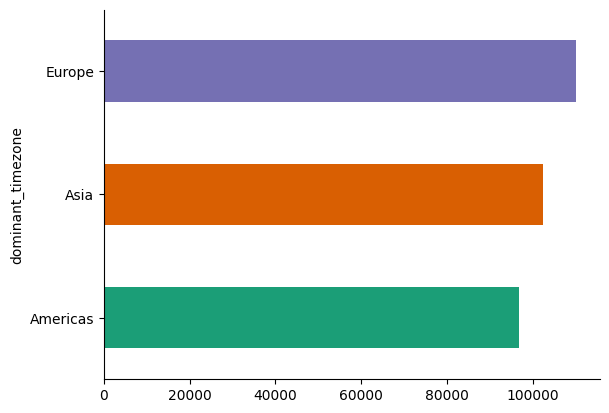

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('dominant_timezone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

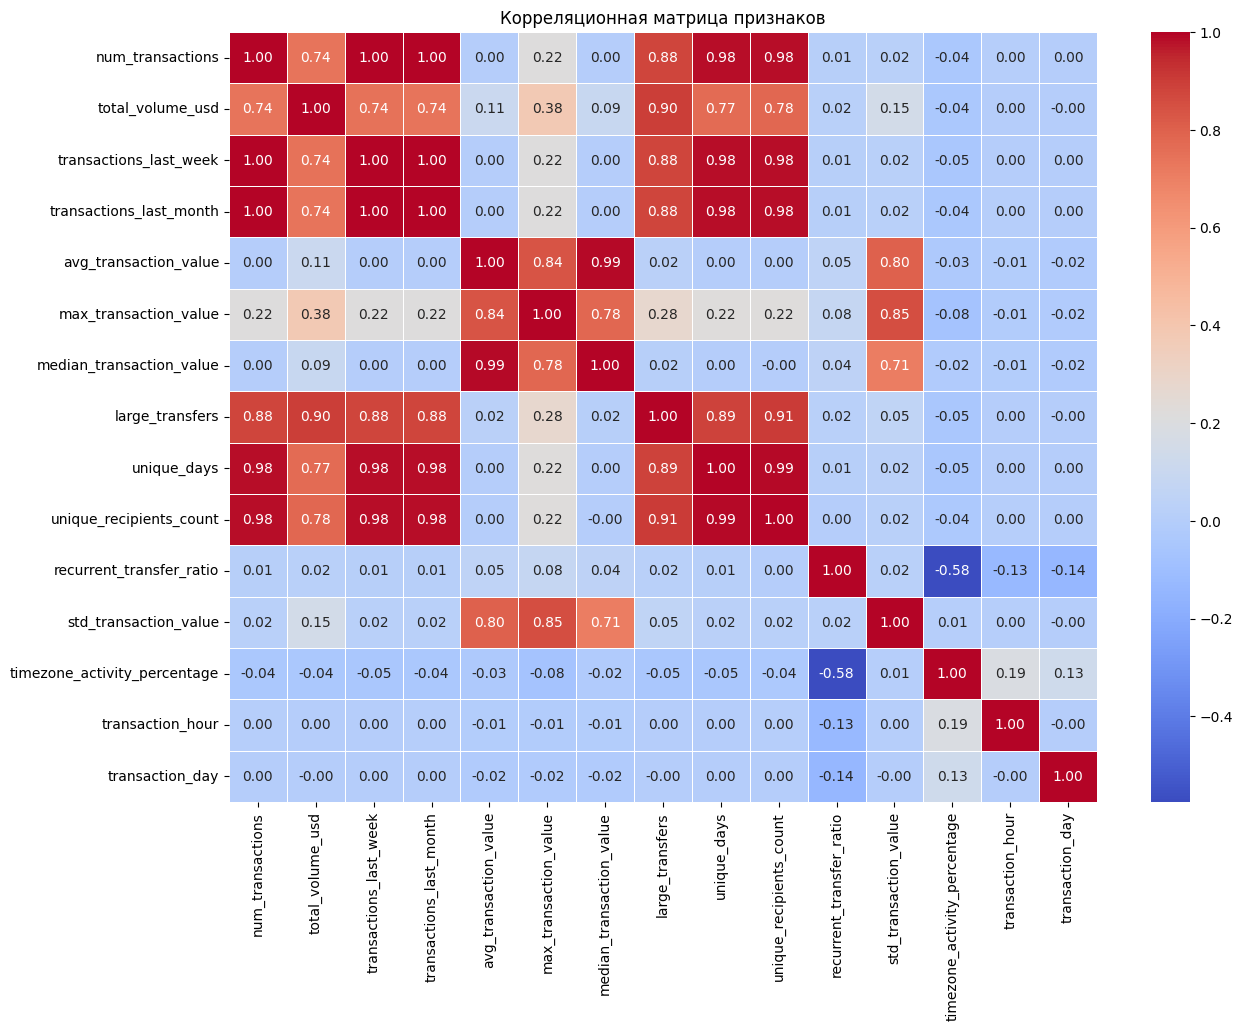

                              num_transactions  total_volume_usd  \
num_transactions                          1.00              0.74   
total_volume_usd                          0.74              1.00   
transactions_last_week                    1.00              0.74   
transactions_last_month                   1.00              0.74   
avg_transaction_value                     0.00              0.11   
max_transaction_value                     0.22              0.38   
median_transaction_value                  0.00              0.09   
large_transfers                           0.88              0.90   
unique_days                               0.98              0.77   
unique_recipients_count                   0.98              0.78   
recurrent_transfer_ratio                  0.01              0.02   
std_transaction_value                     0.02              0.15   
timezone_activity_percentage             -0.04             -0.04   
transaction_hour                          0.00  

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_df = df_final.select_dtypes(include=['number'])


correlation_matrix = numerical_df.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.show()
print(correlation_matrix)


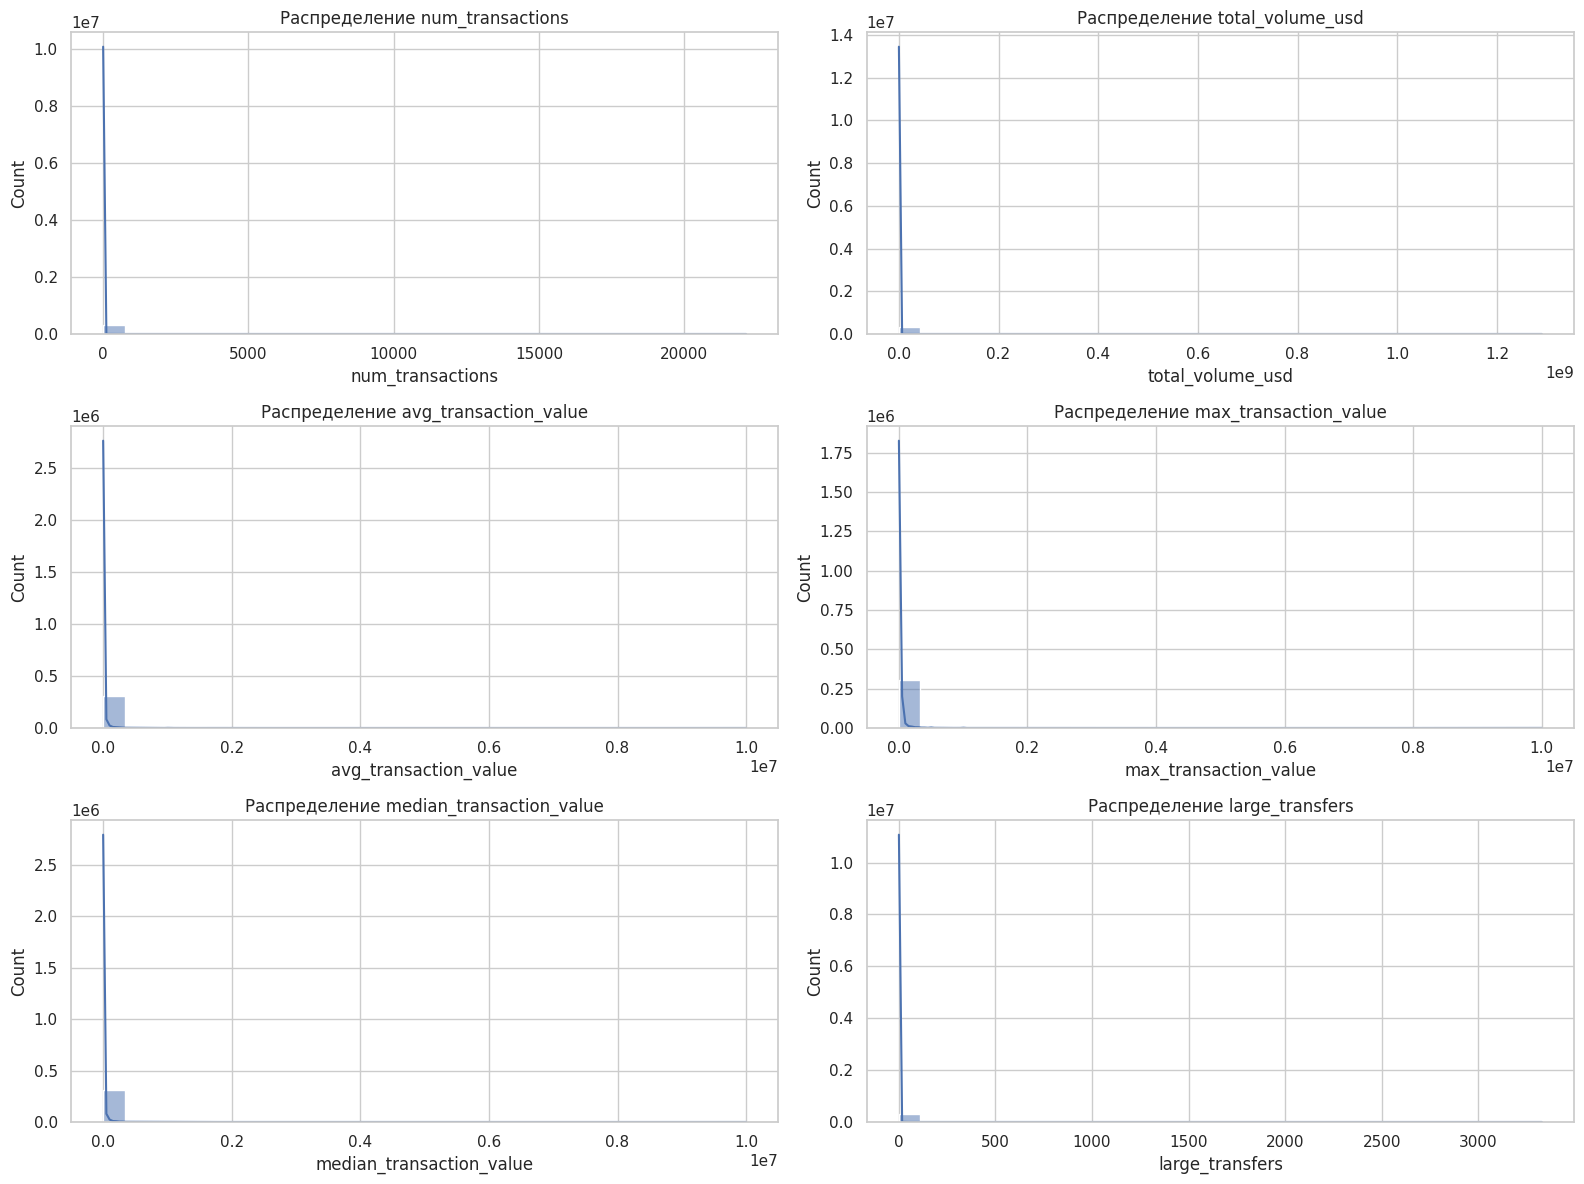

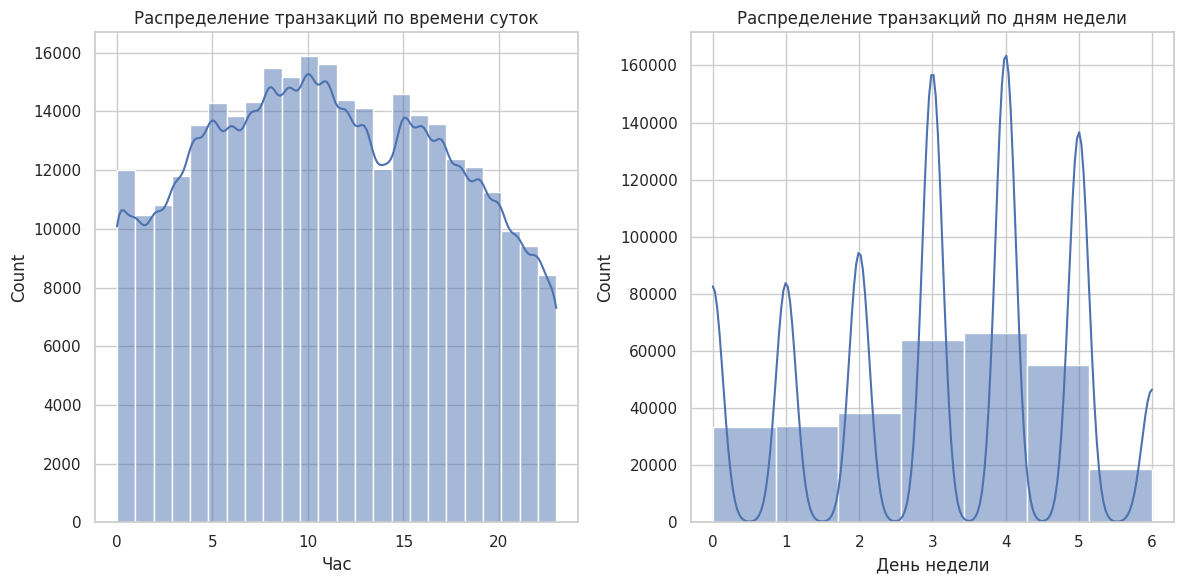

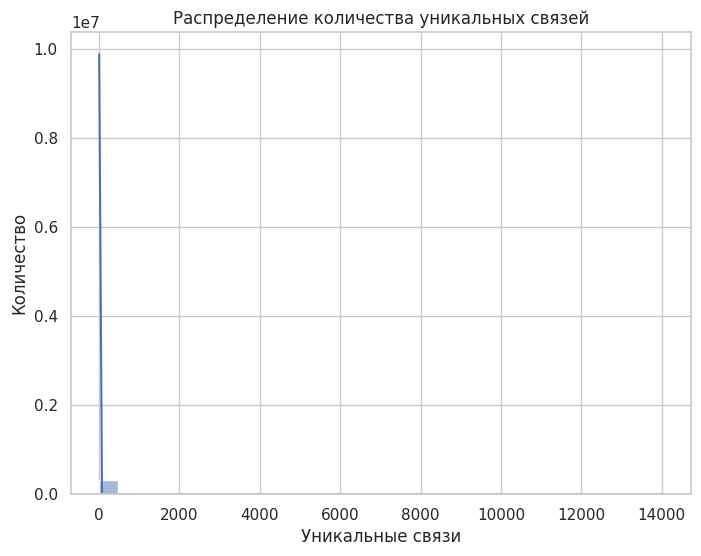

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


numerical_cols = ['num_transactions', 'total_volume_usd', 'avg_transaction_value',
                  'max_transaction_value', 'median_transaction_value', 'large_transfers']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df_final['transaction_hour'], bins=24, kde=True)
plt.title("Распределение транзакций по времени суток")
plt.xlabel("Час")


plt.subplot(1, 2, 2)
sns.histplot(df_final['transaction_day'], bins=7, kde=True)
plt.title("Распределение транзакций по дням недели")
plt.xlabel("День недели")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df_final['unique_recipients_count'], kde=True, bins=30)
plt.title("Распределение количества уникальных связей")
plt.xlabel("Уникальные связи")
plt.ylabel("Количество")
plt.show()



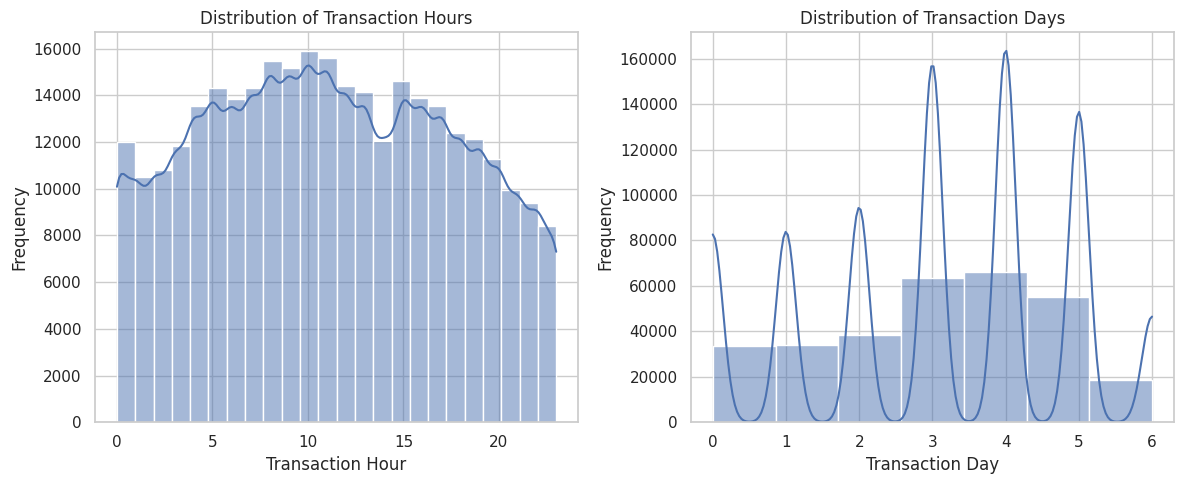

In [ ]:
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['transaction_hour'], bins=24, kde=True)
plt.title('Distribution of Transaction Hours')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_final['transaction_day'], bins=df_final['transaction_day'].nunique(), kde=True)
plt.title('Distribution of Transaction Days')
plt.xlabel('Transaction Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df_final.head(10)

,wallet_address,num_transactions,total_volume_usd,transactions_last_week,transactions_last_month,avg_transaction_value,max_transaction_value,median_transaction_value,large_transfers,unique_days,unique_recipients_count,recurrent_transfer_ratio,first_transaction_time,last_transaction_time,std_transaction_value,dominant_timezone,timezone_activity_percentage,transaction_hour,transaction_day
0,0x00000000b3092fd689d264d5639d1d0fdbd75702,25,1576200.97,14,25,63048.04,100000.00,60714.41,24,25,3,0.67,2024-05-23 11:30:23,2024-05-31 14:05:23,26266.95,Asia,48.00,18,3
1,0x00000000c001e13b7b74b7aa01afd9c77f907a7a,1,10449.03,1,1,10449.03,10449.03,10449.03,1,1,1,0.00,2024-05-29 05:06:11,2024-05-29 05:06:11,NaN,Americas,100.00,5,2
2,0x00000000e4da7e74bf3519bedfe49dd87092f2bb,2353,5240.72,2318,2353,2.23,40.00,1.00,0,2353,2353,0.00,2024-05-25 18:54:35,2024-06-01 22:32:59,3.25,Europe,51.68,12,3
3,0x00000001d0298a6b10321d8c3bc2ac59eb5c3717,1,771.00,1,1,771.00,771.00,771.00,0,1,1,0.00,2024-06-01 17:54:59,2024-06-01 17:54:59,NaN,Asia,100.00,17,5
4,0x0000004f491f928054449a28086c2239a669db6e,1,200.00,1,1,200.00,200.00,200.00,0,1,1,0.00,2024-05-26 06:18:35,2024-05-26 06:18:35,NaN,Americas,100.00,6,6
5,0x0000008ab4dbbcb1c898b863faf8ceaf6099f937,2,3000.13,2,2,1500.06,1500.13,1500.06,0,2,1,1.00,2024-05-29 11:56:35,2024-05-30 10:55:23,0.09,Europe,100.00,10,2
6,0x000000edaaf412248f6c1a48104080549da88fea,7,326.48,7,7,46.64,110.00,5.00,0,7,5,0.40,2024-05-25 10:47:23,2024-05-30 20:05:47,56.27,Europe,85.71,10,0
7,0x000000ee130b7deb14fdf5a1df05f14d05ffd000,14,334790.56,10,14,23913.61,100000.00,18235.00,11,14,4,1.00,2024-05-23 15:38:11,2024-06-01 22:01:47,24344.02,Asia,50.00,0,3
8,0x000002d6d7e308ae25aae016df4616860c700000,2,437.79,2,2,218.90,300.93,218.90,0,2,1,1.00,2024-05-26 10:15:35,2024-05-30 05:54:11,116.01,Americas,50.00,5,3
9,0x0000046a8debef1a892bd78ed1a72e17e712c3c7,1,8031.20,1,1,8031.20,8031.20,8031.20,0,1,1,0.00,2024-05-29 05:37:59,2024-05-29 05:37:59,NaN,Americas,100.00,5,2


In [ ]:
nan_counts = df_final.isna().sum()

total_nan = nan_counts.sum()

print("Количество пустых значений в каждом столбце:")
print(nan_counts)
print(f"\nОбщее количество пустых значений: {total_nan}")


Количество пустых значений в каждом столбце:
wallet_address                       0
num_transactions                     0
total_volume_usd                     0
transactions_last_week               0
transactions_last_month              0
avg_transaction_value                0
max_transaction_value                0
median_transaction_value             0
large_transfers                      0
unique_days                          0
unique_recipients_count              0
recurrent_transfer_ratio             0
first_transaction_time               0
last_transaction_time                0
std_transaction_value           235836
dominant_timezone                    0
timezone_activity_percentage         0
transaction_hour                     0
transaction_day                      0
dtype: int64

Общее количество пустых значений: 235836


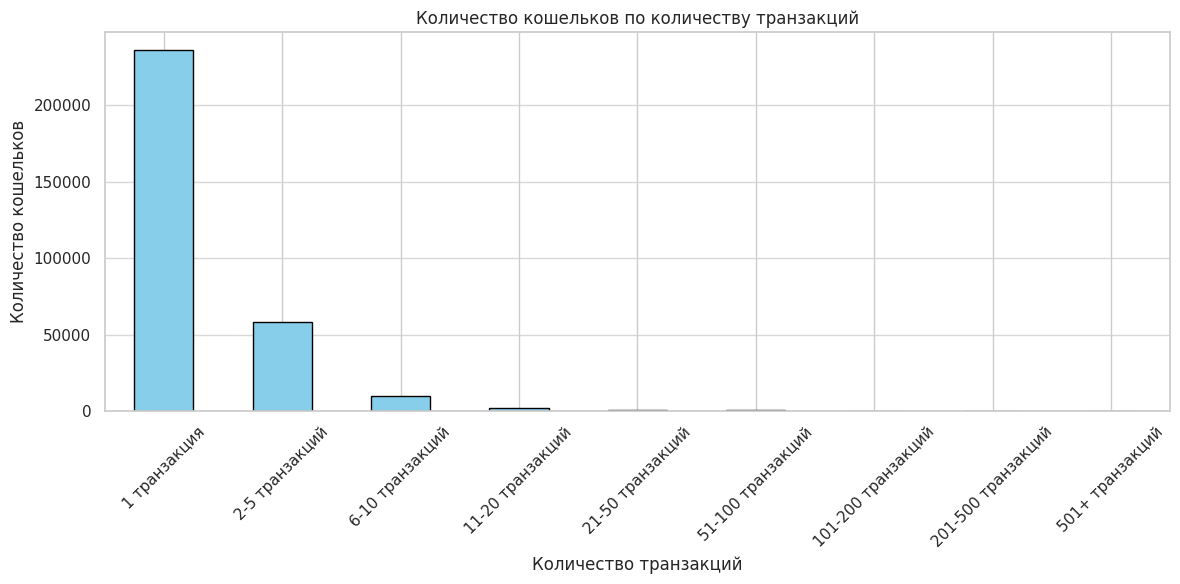

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




bins = [1, 2, 5, 10, 15, 20, 30, 40, 50, 100]  # Пример границ
labels = ['1 транзакция', '2-5 транзакций', '6-10 транзакций', '11-20 транзакций',
          '21-50 транзакций', '51-100 транзакций', '101-200 транзакций',
          '201-500 транзакций', '501+ транзакций']

df_final['transaction_bins'] = pd.cut(df_final['num_transactions'], bins=bins, labels=labels, right=False)

bid_counts = df_final['transaction_bins'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bid_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество кошельков по количеству транзакций')
plt.xlabel('Количество транзакций')
plt.ylabel('Количество кошельков')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


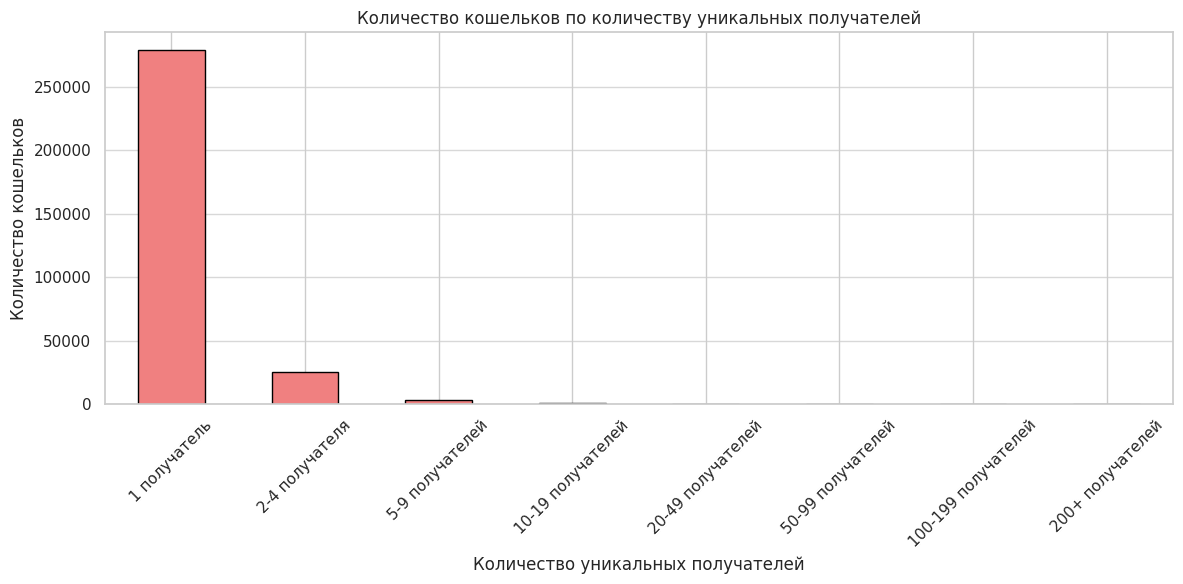

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


bins_recipients = [1, 2, 5, 10, 20, 50, 100, 200, float('inf')]
labels_recipients = ['1 получатель', '2-4 получателя', '5-9 получателей',
                     '10-19 получателей', '20-49 получателей',
                     '50-99 получателей', '100-199 получателей', '200+ получателей']


df_final['recipients_bins'] = pd.cut(df_final['unique_recipients_count'], bins=bins_recipients, labels=labels_recipients, right=False)


recipient_bid_counts = df_final['recipients_bins'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
recipient_bid_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Количество кошельков по количеству уникальных получателей')
plt.xlabel('Количество уникальных получателей')
plt.ylabel('Количество кошельков')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [ ]:
df_info = df_final.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309368 entries, 0 to 309367
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   wallet_address                309368 non-null  object        
 1   num_transactions              309368 non-null  int64         
 2   total_volume_usd              309368 non-null  float64       
 3   transactions_last_week        309368 non-null  int64         
 4   transactions_last_month       309368 non-null  int64         
 5   avg_transaction_value         309368 non-null  float64       
 6   max_transaction_value         309368 non-null  float64       
 7   median_transaction_value      309368 non-null  float64       
 8   large_transfers               309368 non-null  int64         
 9   unique_days                   309368 non-null  int64         
 10  unique_recipients_count       309368 non-null  int64         
 11  recurrent_tra

In [ ]:
print("\nСтатистическое описание:")
print(df_final.describe())


Статистическое описание:
       num_transactions  total_volume_usd  transactions_last_week  \
count         309368.00         309368.00               309368.00   
mean               2.91          90762.70                    2.49   
min                1.00              0.00                    1.00   
25%                1.00            144.37                    1.00   
50%                1.00            885.42                    1.00   
75%                1.00           4659.01                    1.00   
max            22124.00     1290243058.10                15765.00   
std              110.74        4863871.42                   79.20   

       transactions_last_month  avg_transaction_value  max_transaction_value  \
count                309368.00              309368.00              309368.00   
mean                      2.91               16809.48               25740.59   
min                       1.00                   0.00                   0.00   
25%                       1.00  

In [ ]:
df_final.head()

,wallet_address,num_transactions,total_volume_usd,transactions_last_week,transactions_last_month,avg_transaction_value,max_transaction_value,median_transaction_value,large_transfers,unique_days,unique_recipients_count,recurrent_transfer_ratio,first_transaction_time,last_transaction_time,std_transaction_value,dominant_timezone,timezone_activity_percentage,transaction_hour,transaction_day,transaction_bins,recipients_bins
0,0x00000000b3092fd689d264d5639d1d0fdbd75702,25,1576200.97,14,25,63048.04,100000.00,60714.41,24,25,3,0.67,2024-05-23 11:30:23,2024-05-31 14:05:23,26266.95,Asia,48.00,18,3,51-100 транзакций,2-4 получателя
1,0x00000000c001e13b7b74b7aa01afd9c77f907a7a,1,10449.03,1,1,10449.03,10449.03,10449.03,1,1,1,0.00,2024-05-29 05:06:11,2024-05-29 05:06:11,NaN,Americas,100.00,5,2,1 транзакция,1 получатель
2,0x00000000e4da7e74bf3519bedfe49dd87092f2bb,2353,5240.72,2318,2353,2.23,40.00,1.00,0,2353,2353,0.00,2024-05-25 18:54:35,2024-06-01 22:32:59,3.25,Europe,51.68,12,3,NaN,200+ получателей
3,0x00000001d0298a6b10321d8c3bc2ac59eb5c3717,1,771.00,1,1,771.00,771.00,771.00,0,1,1,0.00,2024-06-01 17:54:59,2024-06-01 17:54:59,NaN,Asia,100.00,17,5,1 транзакция,1 получатель
4,0x0000004f491f928054449a28086c2239a669db6e,1,200.00,1,1,200.00,200.00,200.00,0,1,1,0.00,2024-05-26 06:18:35,2024-05-26 06:18:35,NaN,Americas,100.00,6,6,1 транзакция,1 получатель


In [ ]:
timezone_mapping = {
    'Asia': 1,
    'Europe': 2,
    'Americas': 3
}

df_final['timezone_numeric'] = df_final['dominant_timezone'].map(timezone_mapping)



In [ ]:
df_final.head()

,wallet_address,num_transactions,total_volume_usd,transactions_last_week,transactions_last_month,avg_transaction_value,max_transaction_value,median_transaction_value,large_transfers,unique_days,unique_recipients_count,recurrent_transfer_ratio,first_transaction_time,last_transaction_time,std_transaction_value,dominant_timezone,timezone_activity_percentage,transaction_hour,transaction_day,transaction_bins,recipients_bins,timezone_numeric
0,0x00000000b3092fd689d264d5639d1d0fdbd75702,25,1576200.97,14,25,63048.04,100000.00,60714.41,24,25,3,0.67,2024-05-23 11:30:23,2024-05-31 14:05:23,26266.95,Asia,48.00,18,3,51-100 транзакций,2-4 получателя,1
1,0x00000000c001e13b7b74b7aa01afd9c77f907a7a,1,10449.03,1,1,10449.03,10449.03,10449.03,1,1,1,0.00,2024-05-29 05:06:11,2024-05-29 05:06:11,NaN,Americas,100.00,5,2,1 транзакция,1 получатель,3
2,0x00000000e4da7e74bf3519bedfe49dd87092f2bb,2353,5240.72,2318,2353,2.23,40.00,1.00,0,2353,2353,0.00,2024-05-25 18:54:35,2024-06-01 22:32:59,3.25,Europe,51.68,12,3,NaN,200+ получателей,2
3,0x00000001d0298a6b10321d8c3bc2ac59eb5c3717,1,771.00,1,1,771.00,771.00,771.00,0,1,1,0.00,2024-06-01 17:54:59,2024-06-01 17:54:59,NaN,Asia,100.00,17,5,1 транзакция,1 получатель,1
4,0x0000004f491f928054449a28086c2239a669db6e,1,200.00,1,1,200.00,200.00,200.00,0,1,1,0.00,2024-05-26 06:18:35,2024-05-26 06:18:35,NaN,Americas,100.00,6,6,1 транзакция,1 получатель,3


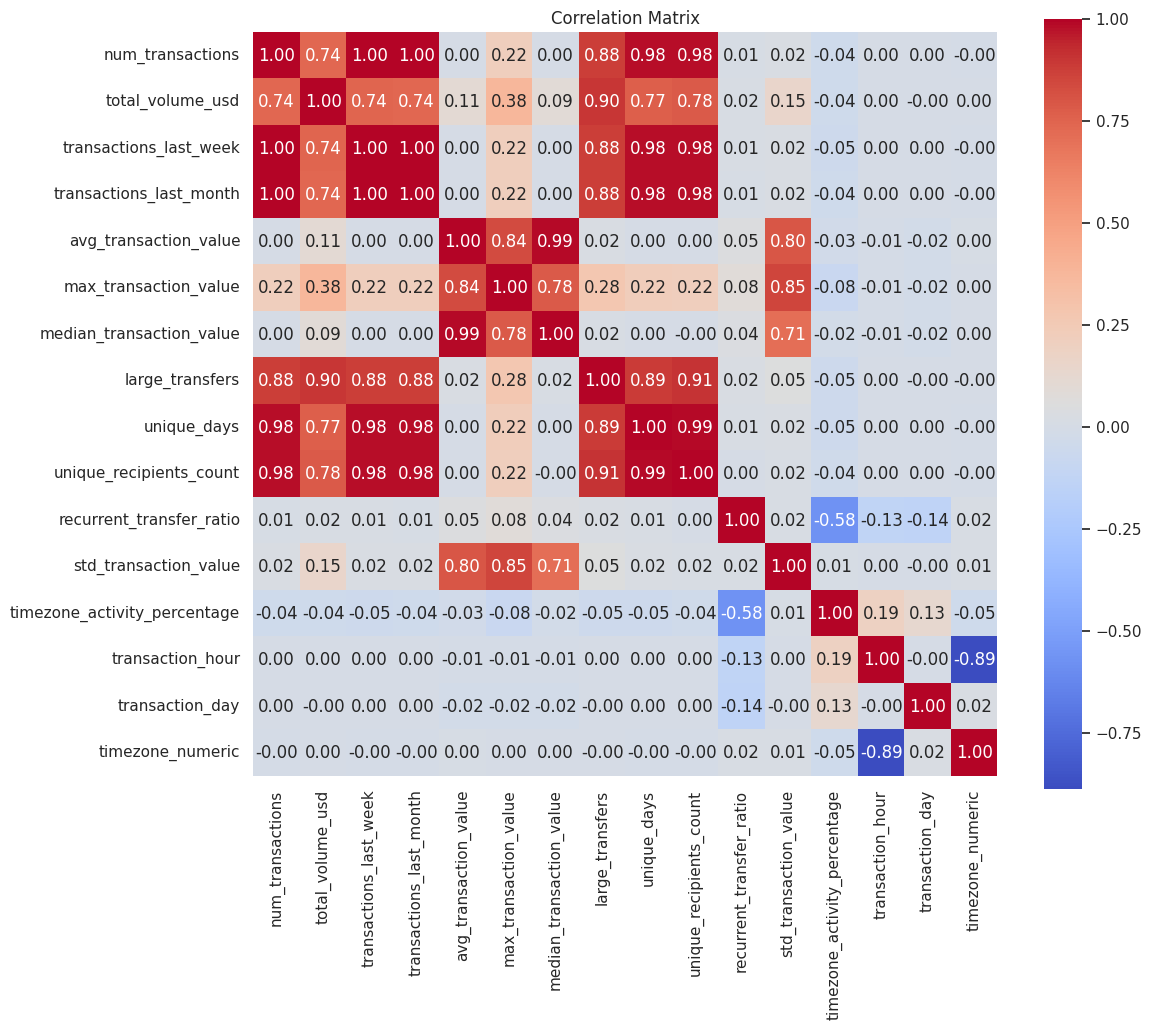

Признаки и их корреляция:
                              num_transactions  total_volume_usd  \
num_transactions                          1.00              0.74   
total_volume_usd                          0.74              1.00   
transactions_last_week                    1.00              0.74   
transactions_last_month                   1.00              0.74   
avg_transaction_value                     0.00              0.11   
max_transaction_value                     0.22              0.38   
median_transaction_value                  0.00              0.09   
large_transfers                           0.88              0.90   
unique_days                               0.98              0.77   
unique_recipients_count                   0.98              0.78   
recurrent_transfer_ratio                  0.01              0.02   
std_transaction_value                     0.02              0.15   
timezone_activity_percentage             -0.04             -0.04   
transaction_hour      

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_numeric = df_final.drop(columns=['wallet_address', 'first_transaction_time', 'last_transaction_time', 'dominant_timezone', 'transaction_bins', 'recipients_bins'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

correlation_matrix = pd.DataFrame(df_scaled, columns=df_numeric.columns).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

print("Признаки и их корреляция:")
print(correlation_matrix)

In [ ]:
df_numeric = df_numeric.drop(columns=['std_transaction_value'])

In [ ]:
df_numeric = df_numeric.drop(columns=['recurrent_transfer_ratio'])

In [ ]:
df_numeric.head(10)


,num_transactions,total_volume_usd,transactions_last_week,transactions_last_month,avg_transaction_value,max_transaction_value,median_transaction_value,large_transfers,unique_days,unique_recipients_count,timezone_activity_percentage,transaction_hour,transaction_day,timezone_numeric
0,25,1576200.97,14,25,63048.04,100000.00,60714.41,24,25,3,48.00,18,3,1
1,1,10449.03,1,1,10449.03,10449.03,10449.03,1,1,1,100.00,5,2,3
2,2353,5240.72,2318,2353,2.23,40.00,1.00,0,2353,2353,51.68,12,3,2
3,1,771.00,1,1,771.00,771.00,771.00,0,1,1,100.00,17,5,1
4,1,200.00,1,1,200.00,200.00,200.00,0,1,1,100.00,6,6,3
5,2,3000.13,2,2,1500.06,1500.13,1500.06,0,2,1,100.00,10,2,2
6,7,326.48,7,7,46.64,110.00,5.00,0,7,5,85.71,10,0,2
7,14,334790.56,10,14,23913.61,100000.00,18235.00,11,14,4,50.00,0,3,1
8,2,437.79,2,2,218.90,300.93,218.90,0,2,1,50.00,5,3,3
9,1,8031.20,1,1,8031.20,8031.20,8031.20,0,1,1,100.00,5,2,3


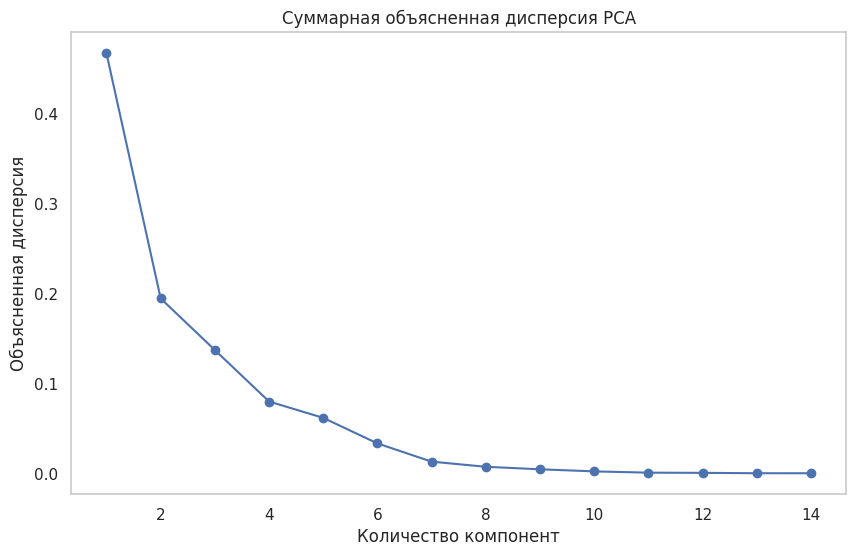

Компонента 1: 0.4667
Компонента 2: 0.1943
Компонента 3: 0.1369
Компонента 4: 0.0797
Компонента 5: 0.0615
Компонента 6: 0.0332
Компонента 7: 0.0129
Компонента 8: 0.0072
Компонента 9: 0.0044
Компонента 10: 0.0021
Компонента 11: 0.0007
Компонента 12: 0.0004
Компонента 13: 0.0000
Компонента 14: 0.0000
Массив arr: [0.46671663605911046, 0.19427051602271286, 0.13692987998489878, 0.07971904493364868, 0.06154845870544548, 0.033154114734972324, 0.012896053619748372, 0.007186738226518206, 0.004394867489481085, 0.002074476931454926, 0.0006539250530398149, 0.00042748134931180036, 2.7806889657182912e-05, 1.0449916151517896e-16]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Применение PCA
pca = PCA()
pca.fit(df_scaled)

# Построение графика объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Суммарная объясненная дисперсия PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.grid()
plt.show()

# Сохранение объясненной дисперсии в массив
arr = []
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    arr.append(var)
    print(f'Компонента {i+1}: {var:.4f}')

# Проверка содержимого массива arr
print("Массив arr:", arr)


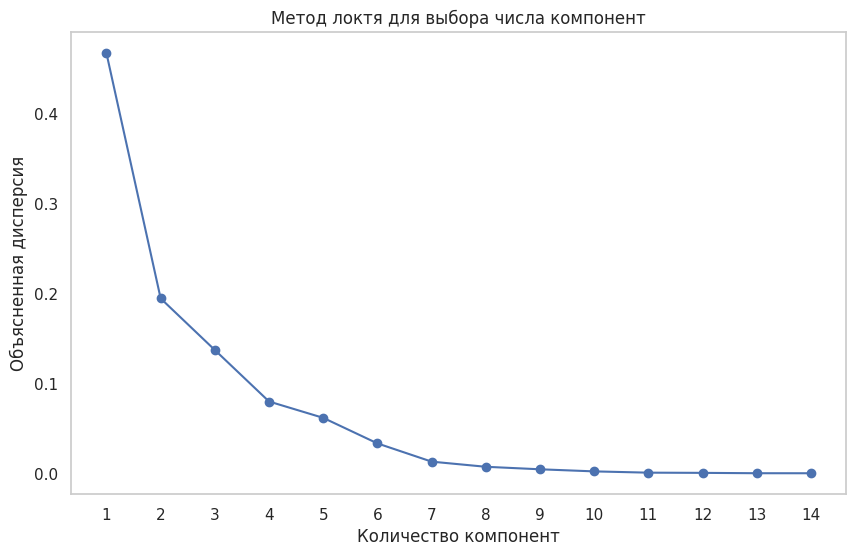

In [ ]:
import matplotlib.pyplot as plt


components = list(range(1, 15))
explained_variance = arr

plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance, marker='o')
plt.title('Метод локтя для выбора числа компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Объясненная дисперсия')
plt.xticks(components)
plt.grid()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


pca = PCA(n_components=7)
pca.fit(df_numeric)


weights = pca.components_


In [ ]:
feature_names = df_numeric.columns
weights_df = pd.DataFrame(weights, columns=feature_names)

print(weights_df)


   num_transactions  total_volume_usd  transactions_last_week  \
0              0.00              1.00                    0.00   
1             -0.00             -0.02                   -0.00   
2              0.00             -0.01                    0.00   
3             -0.00              0.00                   -0.00   
4              0.54             -0.00                    0.38   
5              0.08              0.00                    0.05   
6             -0.31             -0.00                   -0.24   

   transactions_last_month  avg_transaction_value  max_transaction_value  \
0                     0.00                   0.00                   0.02   
1                    -0.00                   0.50                   0.71   
2                     0.00                  -0.42                   0.70   
3                    -0.00                   0.75                  -0.09   
4                     0.54                   0.00                  -0.00   
5                     0

In [ ]:

for i in range(weights_df.shape[0]):
    print(f"Компонента {i + 1}:")
    print(weights_df.iloc[i].abs().nlargest(6))
    print("\n")


Компонента 1:
total_volume_usd           1.00
max_transaction_value      0.02
avg_transaction_value      0.00
median_transaction_value   0.00
transactions_last_month    0.00
num_transactions           0.00
Name: 0, dtype: float64


Компонента 2:
max_transaction_value      0.71
avg_transaction_value      0.50
median_transaction_value   0.49
total_volume_usd           0.02
transactions_last_month    0.00
num_transactions           0.00
Name: 1, dtype: float64


Компонента 3:
max_transaction_value          0.70
median_transaction_value       0.58
avg_transaction_value          0.42
total_volume_usd               0.01
timezone_activity_percentage   0.00
unique_recipients_count        0.00
Name: 2, dtype: float64


Компонента 4:
avg_transaction_value      0.75
median_transaction_value   0.65
max_transaction_value      0.09
total_volume_usd           0.00
transactions_last_month    0.00
num_transactions           0.00
Name: 3, dtype: float64


Компонента 5:
transactions_last_month   0.54
num

Здесь мы видим компоненты, и мы выбарем лучшие из них. Они меняются от размера выборки, поэтому каждый раз нужно выбирать по новому. **Важно если две выбранные переменные с высоким коэффицентом, но у этих переменных высокая корреляция между собой, то нужно выбрать другю переменную, у которой меньший коэффицент PCA, но корреляция отсутсвует**

In [ ]:
from sklearn.preprocessing import StandardScaler

selected_features = [
    'total_volume_usd',
    'avg_transaction_value',
    'unique_recipients_count',
    'unique_days',
    'max_transaction_value',
    'timezone_activity_percentage',
    'transaction_hour',
    'transactions_last_month'
]

data_selected = df_numeric[selected_features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Создание DataFrame с масштабированными данными и исходными именами столбцов
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)


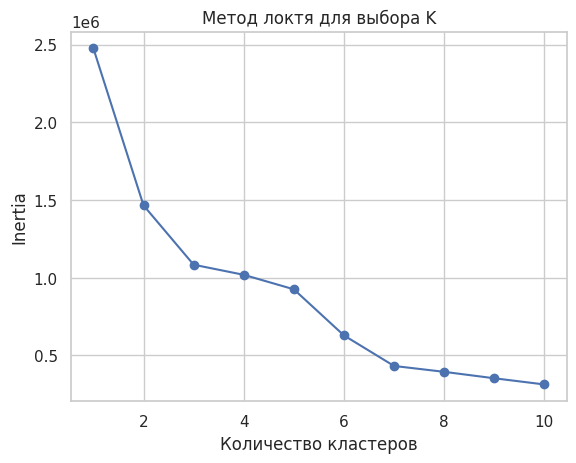

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)  # Проверим от 1 до 10 кластеров
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора K')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled_df)
    silhouette_scores.append(silhouette_score(data_scaled_df, labels))

plt.plot(range(3, 8), silhouette_scores, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.title('Силуэтный анализ для выбора K')
plt.show()


KeyboardInterrupt: 

In [ ]:
data_scaled_df.head(10)

,total_volume_usd,avg_transaction_value,unique_recipients_count,unique_days,max_transaction_value,timezone_activity_percentage,transaction_hour,transactions_last_month
0,0.31,0.28,0.01,0.25,0.29,-2.99,1.06,0.20
1,-0.02,-0.04,-0.01,-0.02,-0.06,0.39,-0.95,-0.02
2,-0.02,-0.10,32.54,26.17,-0.10,-2.75,0.13,21.22
3,-0.02,-0.10,-0.01,-0.02,-0.10,0.39,0.90,-0.02
4,-0.02,-0.10,-0.01,-0.02,-0.10,0.39,-0.80,-0.02
5,-0.02,-0.09,-0.01,-0.01,-0.10,0.39,-0.18,-0.01
6,-0.02,-0.10,0.04,0.05,-0.10,-0.54,-0.18,0.04
7,0.05,0.04,0.03,0.13,0.29,-2.86,-1.72,0.10
8,-0.02,-0.10,-0.01,-0.01,-0.10,-2.86,-0.95,-0.01
9,-0.02,-0.05,-0.01,-0.02,-0.07,0.39,-0.95,-0.02


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


results = {}

n_clusters_list = [4, 6]

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled_df)

    results[n_clusters] = {
        "model": kmeans,
        "labels": labels,
        "silhouette_score": silhouette_score(data_scaled_df, labels)
    }

final_n_clusters = 6
data_scaled_df['Cluster'] = results[final_n_clusters]['labels']


print(data_scaled_df.head(10))


for n_clusters, result in results.items():
    print(f"Количество кластеров: {n_clusters}")
    print(f"Силуэтный коэффициент: {result['silhouette_score']:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for ax, n_clusters in zip(axes, n_clusters_list):
    ax.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=results[n_clusters]["labels"], cmap="viridis")
    ax.set_title(f"{n_clusters} кластера")
plt.suptitle("Распределение кластеров для разных значений K")
plt.show()


Количество кластеров (GMM): 4
Силуэтный коэффициент (GMM): 0.1772
Количество кластеров (GMM): 6
Силуэтный коэффициент (GMM): 0.1707


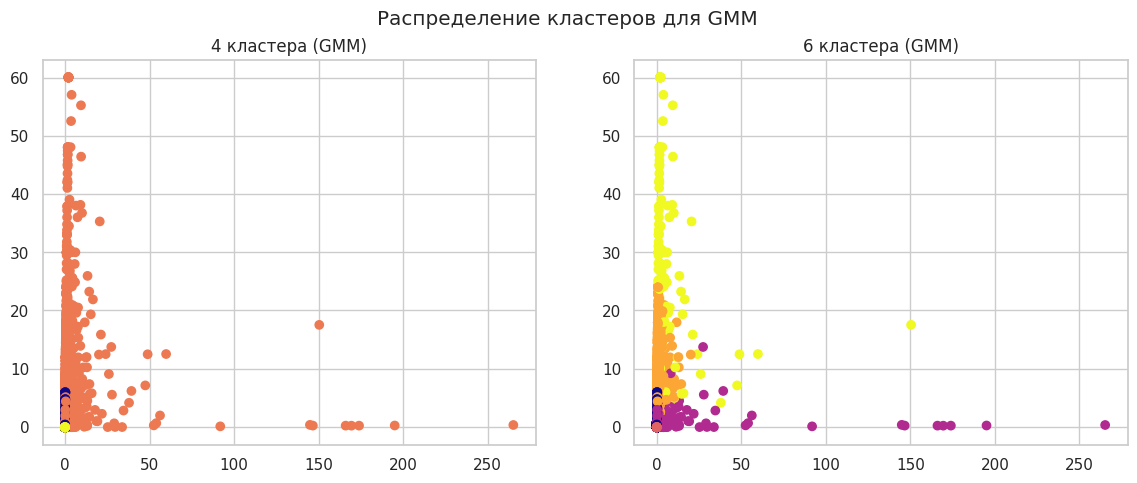

In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


gmm_results = {}


for n_clusters in n_clusters_list:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data_scaled_df)


    gmm_results[n_clusters] = {
        "model": gmm,
        "labels": labels,
        "silhouette_score": silhouette_score(data_scaled_df, labels)
    }


for n_clusters, result in gmm_results.items():
    print(f"Количество кластеров (GMM): {n_clusters}")
    print(f"Силуэтный коэффициент (GMM): {result['silhouette_score']:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for ax, n_clusters in zip(axes, n_clusters_list):
    ax.scatter(data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], c=gmm_results[n_clusters]["labels"], cmap="plasma")
    ax.set_title(f"{n_clusters} кластера (GMM)")
plt.suptitle("Распределение кластеров для GMM")
plt.show()


In [ ]:
data_scaled_df['Cluster'] = gmm_results[6]["labels"]

data_scaled_df.head()


In [ ]:
data_scaled_df.head()

In [ ]:
num_unique_clusters = data_scaled_df['Cluster'].nunique()
print("Количество уникальных классов (кластеров):", num_unique_clusters)

In [ ]:
import pandas as pd

average_characteristics = data_scaled_df.groupby('Cluster').mean()


print("Средние характеристики по каждому классу:")
print(average_characteristics)


In [ ]:
cluster_characteristics = data_scaled_df.groupby('Cluster').mean()

print("Характеристики каждого кластера:")
print(cluster_characteristics)


In [ ]:
clusters = data_scaled_df['Cluster'].copy()

data_scaled_df = data_scaled_df.drop(columns=['Cluster'])

data_original = scaler.inverse_transform(data_scaled_df)

data_original_df = pd.DataFrame(data_original, columns=data_scaled_df.columns)

data_original_df['Cluster'] = clusters

In [ ]:

cluster_characteristics = data_original_df.groupby('Cluster').mean()

print("Характеристики каждого кластера:")
print(cluster_characteristics)

In [ ]:
clusters = data_original_df['Cluster']

# Объединяем датафреймы
df_numeric_with_clusters = df_numeric.join(clusters.rename('Clusters'))

# Выводим результат
print(df_numeric_with_clusters.head())

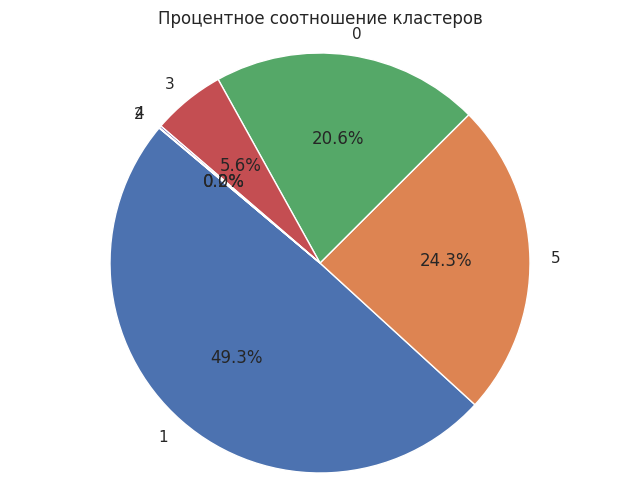

In [ ]:
# Подсчет количества записей в каждом кластере
cluster_counts = df_numeric_with_clusters['Clusters'].value_counts()

# Преобразование в проценты
cluster_percentages = cluster_counts / cluster_counts.sum() * 100
# Создание круговой диаграммы
plt.figure(figsize=(8, 6))  # Задаем размер графика
plt.pie(cluster_percentages, labels=cluster_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Процентное соотношение кластеров')
plt.axis('equal')  # Обеспечивает круговую форму диаграммы
plt.show()
